## Data Understanding

### 1. Import Library dan Load Dataset

In [4]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

# Atur style untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")

print("Library berhasil diimport")

Library berhasil diimport


In [7]:
# Load dataset Iris dari sklearn
IRIS = load_iris()

# Buat DataFrame
df = pd.DataFrame(data=IRIS.data, columns=IRIS.feature_names)
df['species'] = IRIS.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Dataset Iris berhasil dimuat")
print(f"Ukuran dataset: {df.shape[0]} baris, {df.shape[1]} kolom")
df.head()

Dataset Iris berhasil dimuat
Ukuran dataset: 150 baris, 6 kolom


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### 2. Informasi Dasar Dataset

In [56]:
print("\n--- Info Dataset ---")
df.info()

print("\n--- 5 Data Teratas ---")
display(df.head())



--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

--- 5 Data Teratas ---


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [15]:
df["species_name"].value_counts()

species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### 3. Mengecek Tipe Data dan Jenis Variabel

In [25]:
print("\n--- Tipe Data Kolom ---")
print(df.dtypes)

# cek apakah ada data null
print("\n--- Mengecek Missing Value ---")
print(df.isnull().sum())


--- Tipe Data Kolom ---
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
species_name          object
dtype: object

--- Mengecek Missing Value ---
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64


### 4. Eksplorasi Data Awal


--- Deskripsi Statistik ---


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


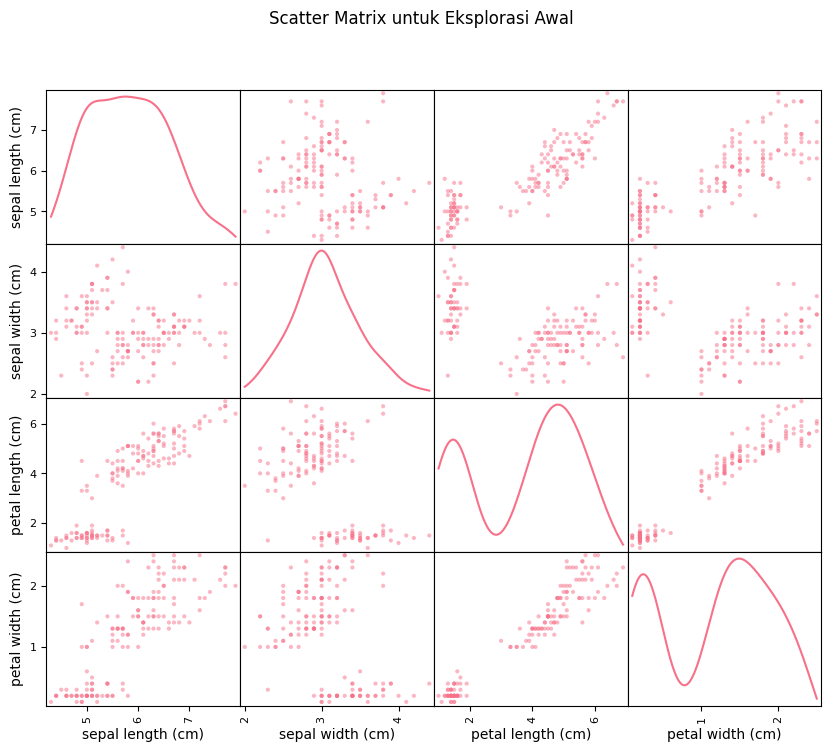

In [62]:
print("\n--- Deskripsi Statistik ---")
display(df.describe().round(2))

# scatter matrix untuk eksplorasi awal
pd.plotting.scatter_matrix(df.drop("species", axis=1), figsize=(10,8), diagonal="kde")
plt.suptitle("Scatter Matrix untuk Eksplorasi Awal")
plt.show()


### 5. Analisis Distribusi Data

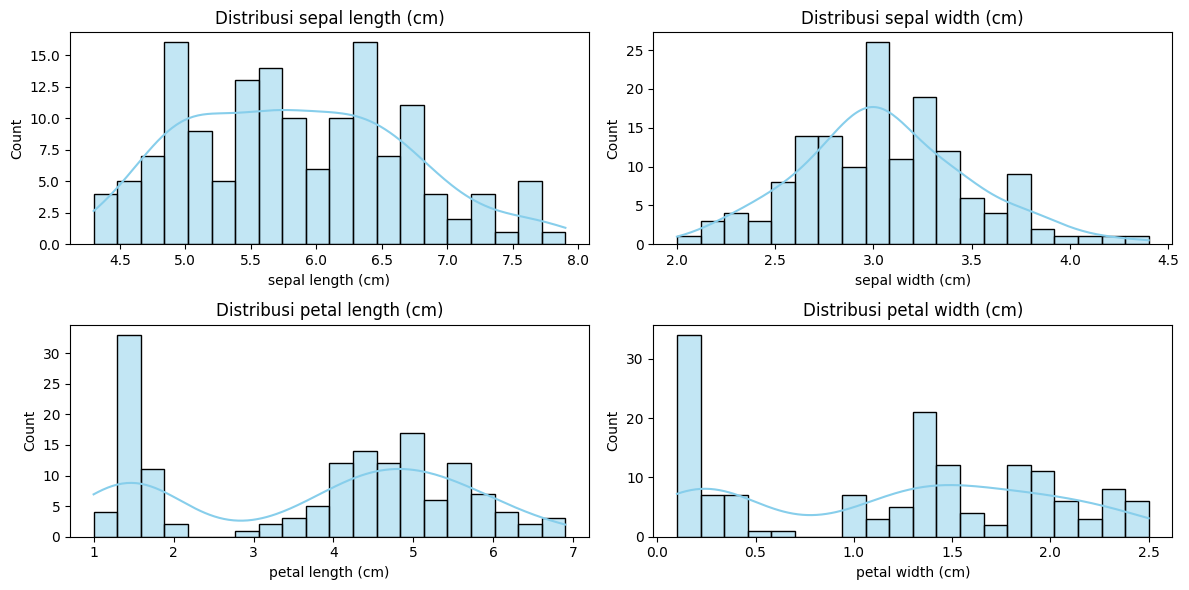

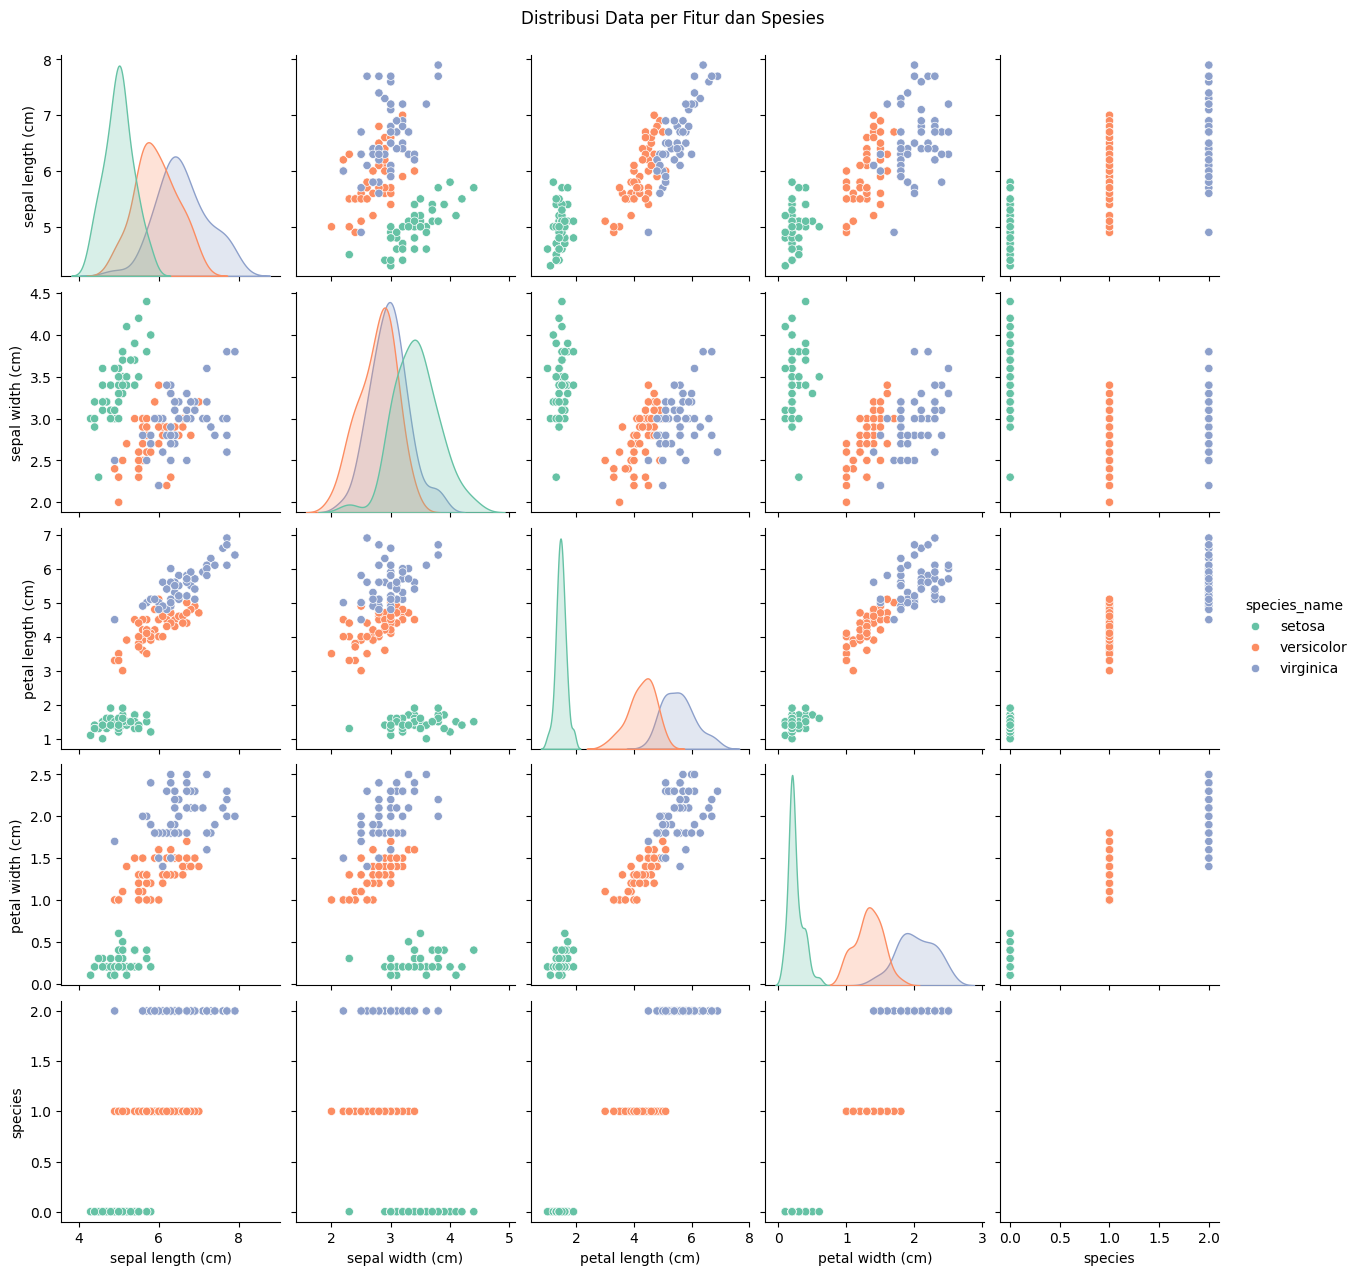

In [29]:
plt.figure(figsize=(12,6))
num_cols = df.columns[:-2]  # Hanya fitur numerik
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,2,i)
    sns.histplot(df[col], kde=True, bins=20, color="skyblue")
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

# Pairplot untuk melihat sebaran per spesies
pairplot_fig = sns.pairplot(df, hue="species_name", palette="Set2")
pairplot_fig.fig.suptitle("Distribusi Data per Fitur dan Spesies", y=1.02)
plt.show()

### 6. Analisis Korelasi Antar Fitur


--- Matriks Korelasi ---
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


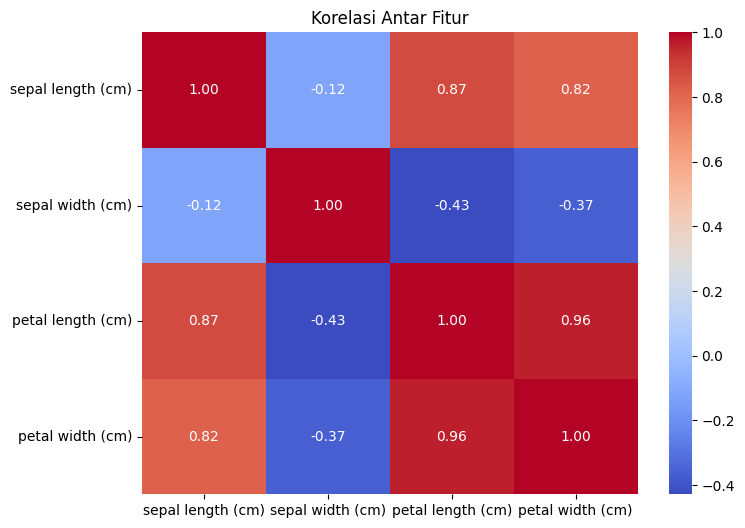

In [ ]:
# Hitung matriks korelasi (hanya kolom numerik)
corr_matrix = df.select_dtypes(include=[np.number]).corr()
print("\n--- Matriks Korelasi ---")
print(corr_matrix)

# Heatmap visualisasi korelasi
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur")
plt.show()


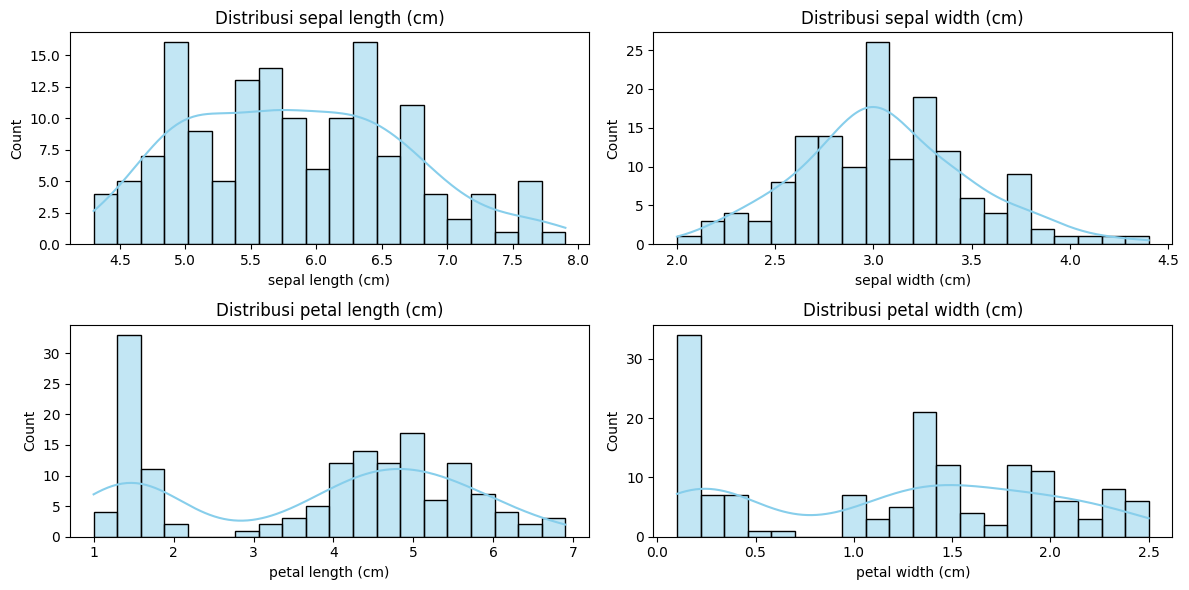

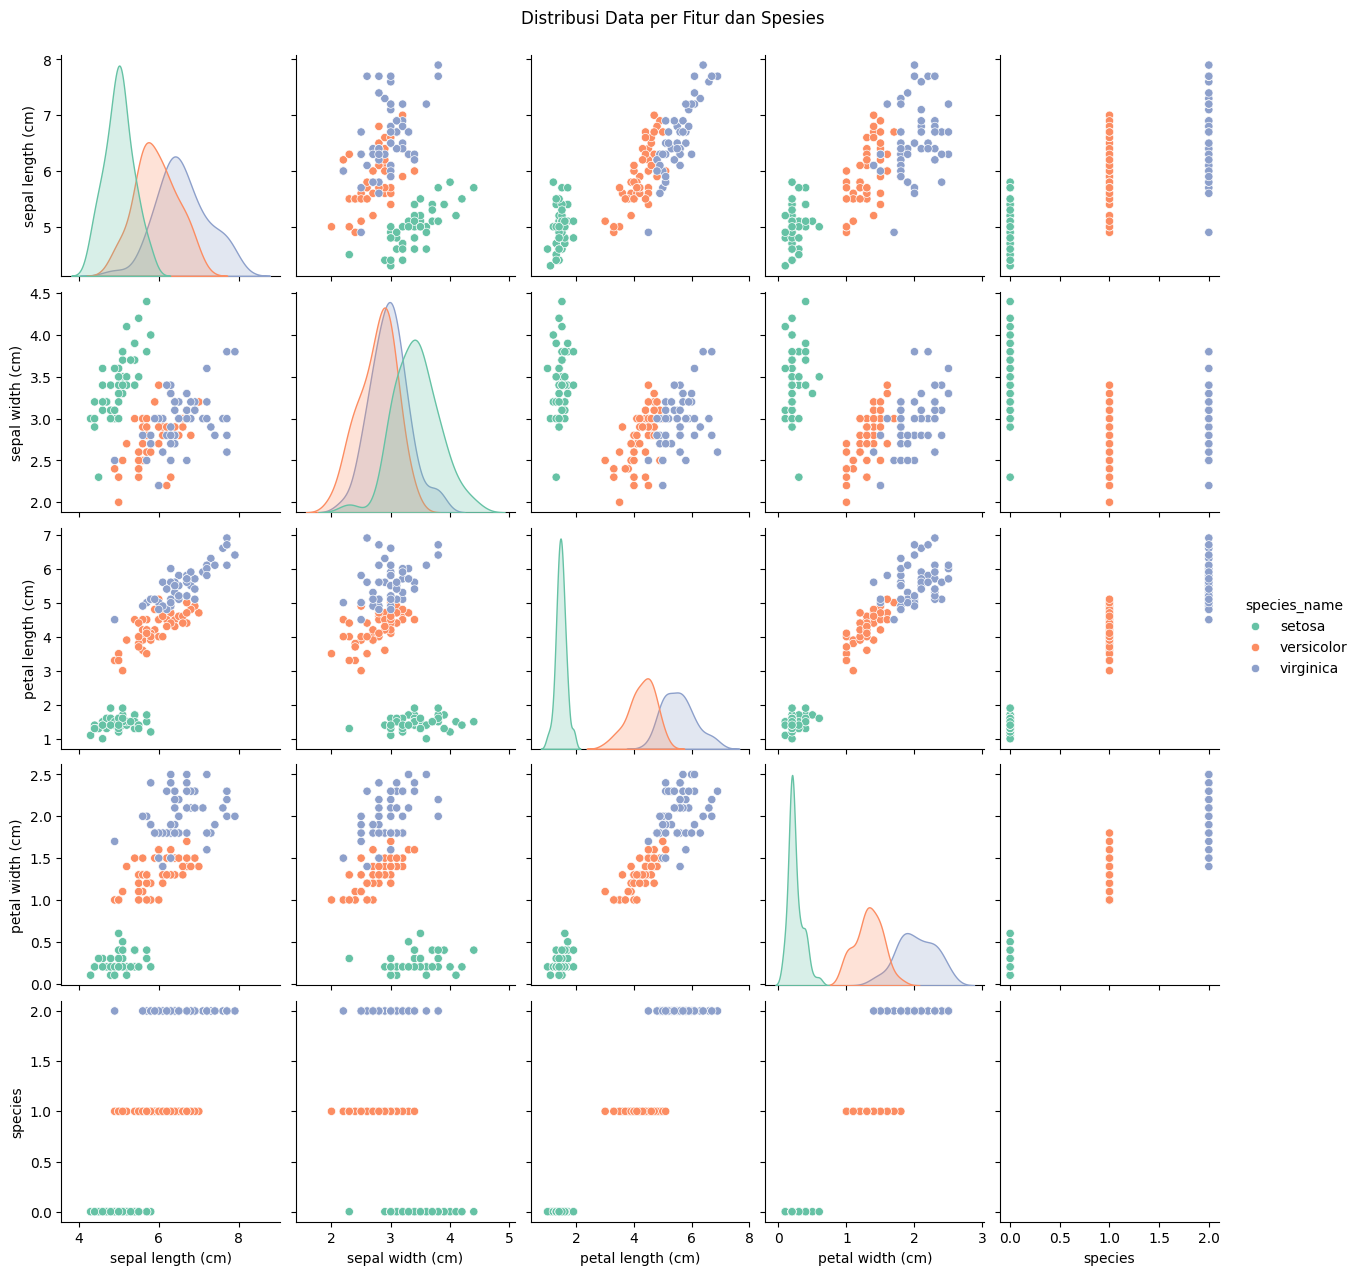

In [ ]:
plt.figure(figsize=(12,6))
num_cols = df.columns[:-2]  # Hanya fitur numerik
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,2,i)
    sns.histplot(df[col], kde=True, bins=20, color="skyblue")
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

# Pairplot untuk melihat sebaran per spesies
pairplot_fig = sns.pairplot(df, hue="species_name", palette="Set2")
pairplot_fig.fig.suptitle("Distribusi Data per Fitur dan Spesies", y=1.02)
plt.show()

### 7. Analisis per Spesies

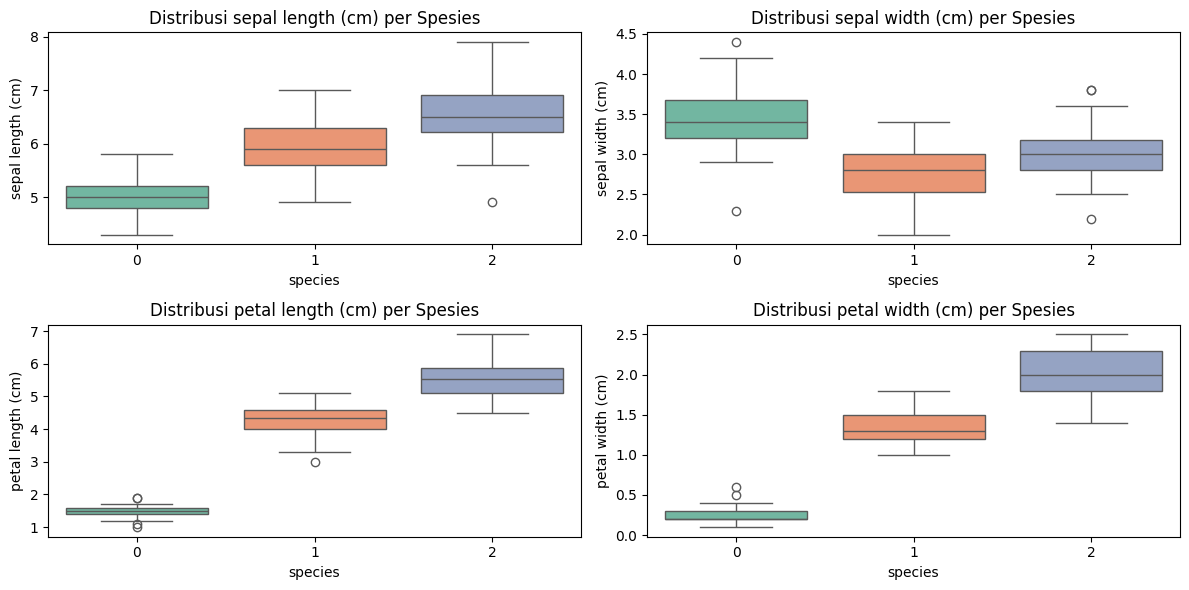

In [37]:
# 7. Analisis per Spesies
# =============================================
plt.figure(figsize=(12,6))
# Only plot the first 4 numeric columns
for i, col in enumerate(df.columns[:4], 1):
    plt.subplot(2,2,i)
    sns.boxplot(x="species", y=col, data=df, palette="Set2")
    plt.title(f"Distribusi {col} per Spesies")
plt.tight_layout()
plt.show()

### 8. Deteksi Outlier

In [49]:
num_cols = df.select_dtypes(include="number").columns

# Hitung IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Deteksi outlier
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | 
            (df[num_cols] > (Q3 + 1.5 * IQR)))

print("\n--- Jumlah Outlier per Kolom ---")
print(outliers.sum())

print("\n--- Persentase Outlier per Kolom ---")
print((outliers.sum() / len(df) * 100).round(2).astype(str) + " %")



--- Jumlah Outlier per Kolom ---
sepal length (cm)    0
sepal width (cm)     4
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

--- Persentase Outlier per Kolom ---
sepal length (cm)     0.0 %
sepal width (cm)     2.67 %
petal length (cm)     0.0 %
petal width (cm)      0.0 %
species               0.0 %
dtype: object


In [50]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_data = df[(df[col] < lower) | (df[col] > upper)][[col, "species"]]
    
    print(f"\nOutlier pada {col}:")
    if not outlier_data.empty:
        print(outlier_data)
    else:
        print("Tidak ada outlier")



Outlier pada sepal length (cm):
Tidak ada outlier

Outlier pada sepal width (cm):
    sepal width (cm)  species
15               4.4        0
32               4.1        0
33               4.2        0
60               2.0        1

Outlier pada petal length (cm):
Tidak ada outlier

Outlier pada petal width (cm):
Tidak ada outlier

Outlier pada species:
Tidak ada outlier


### 9. Kesimpulan

In [48]:
print("""
====================================================
Kesimpulan Data Understanding IRIS
====================================================
1. Dataset terdiri dari 150 baris data dan 5 kolom (4 numerik, 1 kategorikal).
2. Tidak ada missing value pada dataset.
3. Sepal length dan petal length menunjukkan korelasi yang cukup tinggi (~0.87).
4. Distribusi fitur berbeda cukup signifikan antar spesies:
   - Setosa punya petal kecil (pendek & sempit).
   - Versicolor berada di tengah.
   - Virginica punya petal lebih panjang & lebar.
5. Ditemukan beberapa outlier pada sepal width.
6. Secara umum dataset bersih, terstruktur, dan siap dipakai untuk analisis lebih lanjut (klasifikasi).
====================================================
""")


Kesimpulan Data Understanding IRIS
1. Dataset terdiri dari 150 baris data dan 5 kolom (4 numerik, 1 kategorikal).
2. Tidak ada missing value pada dataset.
3. Sepal length dan petal length menunjukkan korelasi yang cukup tinggi (~0.87).
4. Distribusi fitur berbeda cukup signifikan antar spesies:
   - Setosa punya petal kecil (pendek & sempit).
   - Versicolor berada di tengah.
   - Virginica punya petal lebih panjang & lebar.
5. Ditemukan beberapa outlier pada sepal width.
6. Secara umum dataset bersih, terstruktur, dan siap dipakai untuk analisis lebih lanjut (klasifikasi).

